# Breaking axes to show details

Two examples of how to break the axes of a plot in order to skip uninteresting results.

In [12]:
##Set up matplotlib for display in the browser:
%matplotlib inline
import matplotlib as mpl
mpl.rc("savefig", dpi=150)

## From `matplotlib` examples

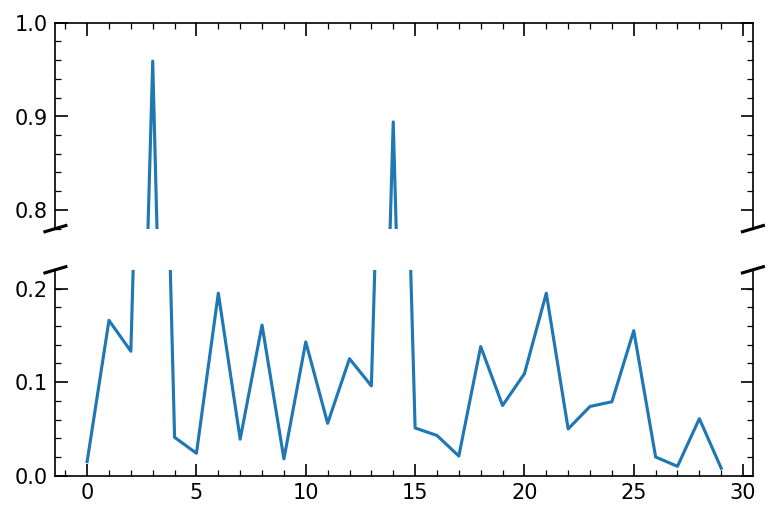

In [13]:
"""
Broken axis example, where the y-axis will have a portion cut out.
"""
import matplotlib.pyplot as plt
import numpy as np


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

## Another approach
This comes from [an entry on StackOverflow](http://stackoverflow.com/questions/32185411/break-in-x-axis-of-matplotlib)

In [14]:
class broken_x_axis:
    def __init__(self, x, y, breaks, d=.015, despine=True, xlims=[None, None], 
                 hspace=.05, *args, **kwargs):
        """
        Broken axis example, where the x-axis will have a portion cut out.
        """
        left = 0.1
        bottom = 0.1
        top = 0.1
        right = 0.1

        if xlims[0] is None:
            xlims[0] = np.min(x)
        len1 = breaks[0] - xlims[0]

        if xlims[1] is None:
            xlims[1] = np.max(x)
        len2 = xlims[1] - breaks[1]

        len1_norm = (1 - left - right - hspace) * len1 / (len1 + len2)
        len2_norm = (1 - left - right - hspace) * len2 / (len1 + len2)

        f = plt.figure()
        ax = f.add_axes([left, bottom, len1_norm, 1 - bottom - top], facecolor='w')
        ax2 = f.add_axes([left + hspace + len1_norm, bottom, len2_norm, 
                          1 - bottom - top], sharey=ax, facecolor='w')

        self.f = f
        self.ax = ax
        self.ax2 = ax2
        self.axs = [ax, ax2]
        self.breaks = breaks
        self.xlims = xlims

        ax.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.yaxis.set_ticks_position('none')
        if despine:
            for dir in ('right', 'top'):
                ax2.spines[dir].set_visible(False)
            ax.spines['top'].set_visible(False)
        ax.yaxis.tick_left()
        ax.tick_params(labelright='off')
        ax2.yaxis.tick_right()
        ax2.tick_params(labelright='off')
        ax2.yaxis.set_ticks_position('none')

        self.plot(x, y, *args, **kwargs)

        self.ax.set_xlim((self.xlims[0], self.breaks[0]))
        self.ax2.set_xlim((self.breaks[1], self.xlims[1]))

        if d:
            kwargs = dict(transform=f.transFigure, color='k', clip_on=False)
            ax.plot((left + len1_norm - d, left + len1_norm + d), 
                    (bottom - d, bottom + d), **kwargs)
            ax2.plot((left + len1_norm + hspace - d, left + len1_norm + hspace + d), 
                     (bottom - d, bottom + d), **kwargs)

            if ax.spines['top'].get_visible():
                ax.plot((left + len1_norm - d, left + len1_norm + d), 
                        (1 - top - d, 1 - top + d), **kwargs)
                ax2.plot((left + len1_norm + hspace - d, left + len1_norm + hspace + d), 
                         (1 - top - d, 1 - top + d), **kwargs)

    def plot(self, x, y, *args, **kwargs):
        for ax in self.axs:
            # plot the same data on both axes
            ax.plot(x, y, *args, **kwargs)

        self.ax.set_xlim((self.xlims[0], self.breaks[0]))
        self.ax2.set_xlim((self.breaks[1], self.xlims[1]))

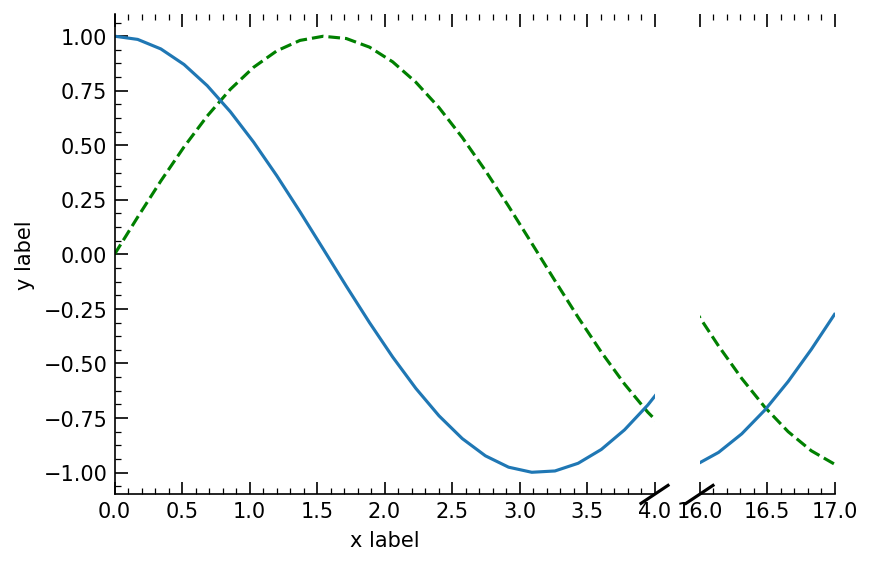

In [15]:
x = np.linspace(0, 17, 100)

bax = broken_x_axis(x, np.sin(x), (4, 16), linestyle='--', color='g')
bax.plot(x, np.cos(x))
bax.ax.set_ylabel('y label')
bax.ax.set_xlabel('x label')